In [1]:
# libraries

import numpy as np
import warnings
import random
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# model
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier

#Encoding
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv("../input/online-food-delivery-preferencesbangalore-region/onlinedeliverydata.csv")
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 55 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        388 non-null    int64  
 1   Gender                                     388 non-null    object 
 2   Marital Status                             388 non-null    object 
 3   Occupation                                 388 non-null    object 
 4   Monthly Income                             388 non-null    object 
 5   Educational Qualifications                 388 non-null    object 
 6   Family size                                388 non-null    int64  
 7   latitude                                   388 non-null    float64
 8   longitude                                  388 non-null    float64
 9   Pin code                                   388 non-null    int64  
 10  Medium (P1)               

In [4]:
data = data[["Age","Gender", "Marital Status","Occupation", "Monthly Income", "Educational Qualifications",
             "Family size","latitude", "longitude", "Pin code","Less Delivery time","High Quality of package","Output"]].copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Less Delivery time          388 non-null    object 
 11  High Quality of package     388 non-null    object 
 12  Output                      388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [5]:
data.isnull().sum() # no empty values

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Less Delivery time            0
High Quality of package       0
Output                        0
dtype: int64

In [6]:
data.head(10)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Less Delivery time,High Quality of package,Output
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Moderately Important,Moderately Important,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Very Important,Very Important,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Important,Very Important,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Very Important,Important,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Important,Important,Yes
5,27,Female,Married,Employee,More than 50000,Post Graduate,2,12.9299,77.6848,560103,Important,Very Important,Yes
6,22,Male,Single,Student,No Income,Graduate,3,12.9770,77.5773,560009,Very Important,Very Important,Yes
7,24,Female,Single,Student,No Income,Post Graduate,3,12.9828,77.6131,560042,Moderately Important,Important,Yes
8,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Important,Important,Yes
9,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Moderately Important,Very Important,Yes


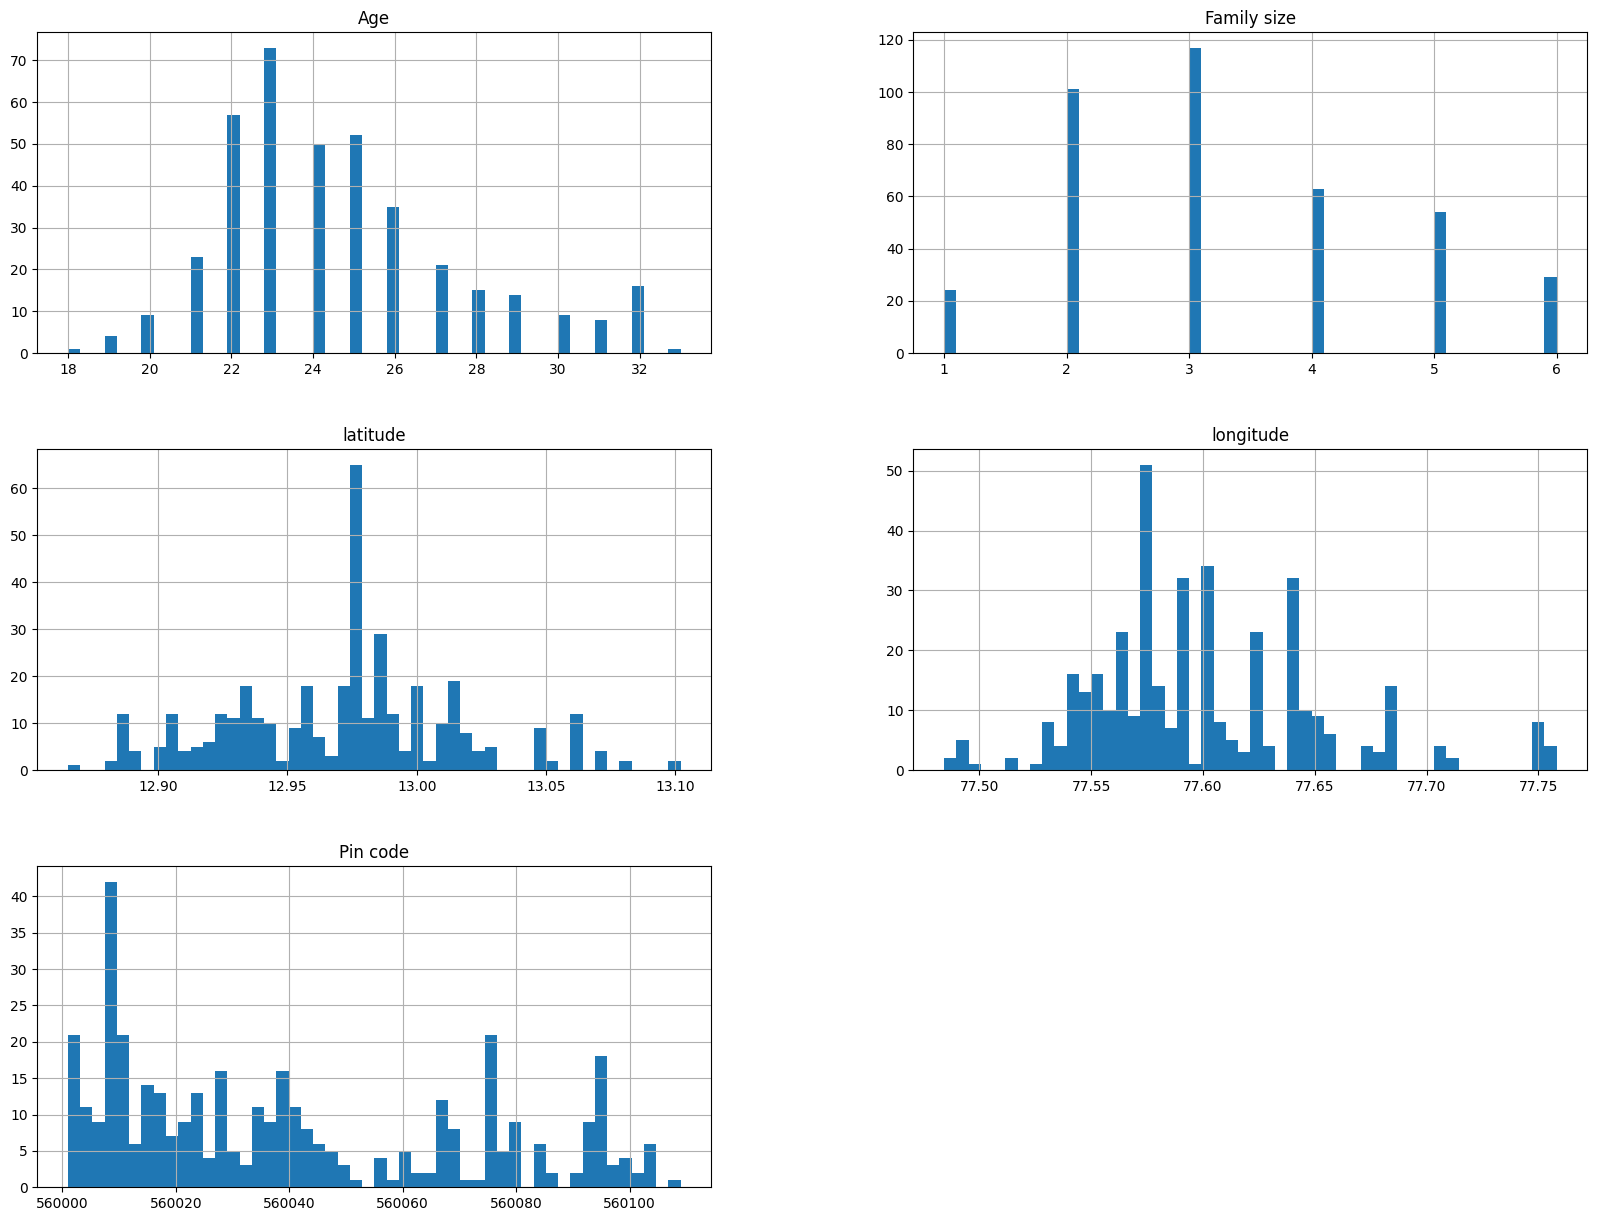

In [7]:
data.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
data["High Quality of package"].unique()

array(['Moderately Important', 'Very Important', 'Important',
       'Unimportant', 'Slightly Important'], dtype=object)

In [9]:
data["Less Delivery time"].unique()

array(['Moderately Important', 'Very Important', 'Important',
       'Slightly Important', 'Unimportant'], dtype=object)

In [10]:
data["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [11]:
data["Monthly Income"].unique()

array(['No Income', 'Below Rs.10000', 'More than 50000', '10001 to 25000',
       '25001 to 50000'], dtype=object)

In [12]:
data["Educational Qualifications"].unique()

array(['Post Graduate', 'Graduate', 'Ph.D', 'Uneducated', 'School'],
      dtype=object)

In [13]:
# Label encode categorical variables
label_encoder = LabelEncoder()
edu_encoder = LabelEncoder()
data["Gender"] = label_encoder.fit_transform(data["Gender"])
data["Occupation"] = label_encoder.fit_transform(data["Occupation"])
data["Educational Qualifications"] = edu_encoder.fit_transform(data["Educational Qualifications"])
data["High Quality of package"] = label_encoder.fit_transform(data["High Quality of package"])
data["Less Delivery time"] = label_encoder.fit_transform(data["Less Delivery time"])
data["Monthly Income"] = label_encoder.fit_transform(data["Monthly Income"])
data["Marital Status"] = label_encoder.fit_transform(data["Marital Status"])
data["Output"] = label_encoder.fit_transform(data["Output"])


In [14]:
data.head(10)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Less Delivery time,High Quality of package,Output
0,20,0,2,3,4,2,4,12.9766,77.5993,560001,1,1,1
1,24,0,2,3,2,0,3,12.9770,77.5773,560009,4,4,1
2,22,1,2,3,2,2,3,12.9551,77.6593,560017,0,4,1
3,22,0,2,3,4,0,6,12.9473,77.5616,560019,4,0,1
4,22,1,2,3,2,2,4,12.9850,77.5533,560010,0,0,1
5,27,0,0,0,3,2,2,12.9299,77.6848,560103,0,4,1
6,22,1,2,3,4,0,3,12.9770,77.5773,560009,4,4,1
7,24,0,2,3,4,2,3,12.9828,77.6131,560042,1,0,1
8,23,0,2,3,4,2,2,12.9766,77.5993,560001,0,0,1
9,23,0,2,3,4,2,4,12.9854,77.7081,560048,1,4,1


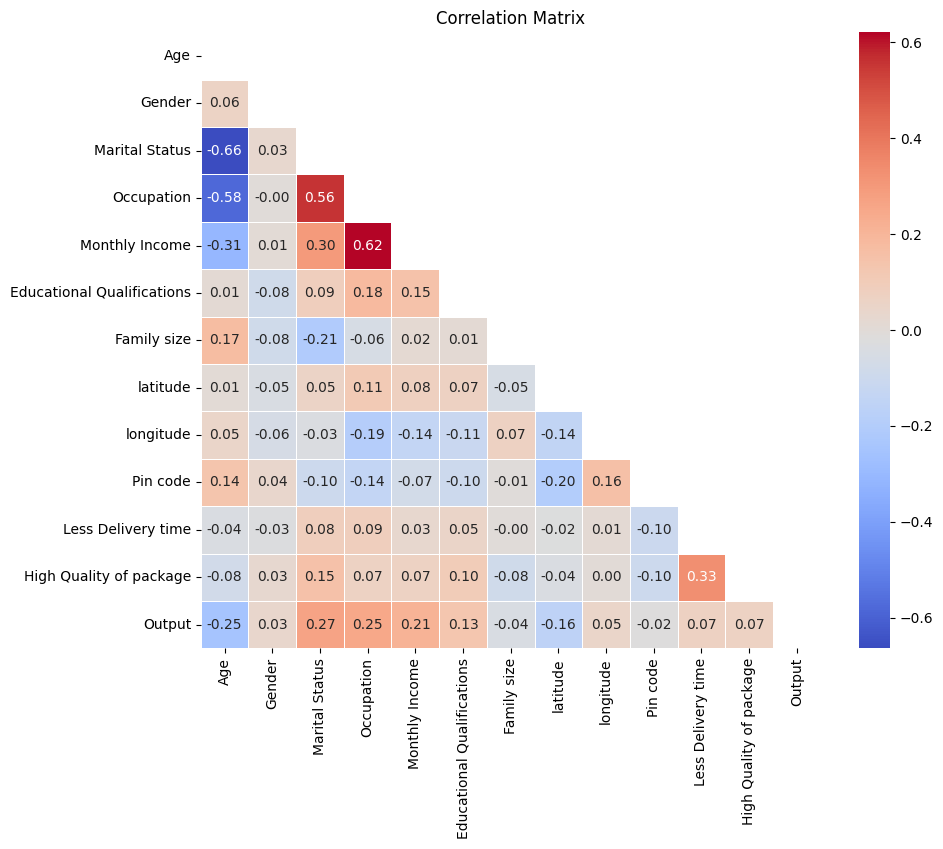

In [15]:
corr_matrix = data.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)

# Add title
plt.title('Correlation Matrix')

# Show the plot
plt.show()

Correlation matrix shows negative correlation of output with latitude and positive correlation with Age


In [16]:
#dropping less correlated features
data=data.drop(['High Quality of package', 'Less Delivery time'], axis=1)

In [17]:
X = data.drop('Output',axis=1)
y = data['Output']

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, 
                                                    random_state=101)

print("Shape of train dataset : ", X_train.shape)
print("Shape of test dataset : ", X_test.shape)

Shape of train dataset :  (310, 10)
Shape of test dataset :  (78, 10)


In [18]:
#train svc classifier
from sklearn.svm import SVC
svm_clf = SVC(gamma="auto", probability=True, random_state=42)
svm_clf.fit(X_train, y_train)

#evaluate
from sklearn.model_selection import cross_val_score
svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=10)
svm_scores.mean()

0.8677419354838708

[[ 6  0]
 [12 60]]


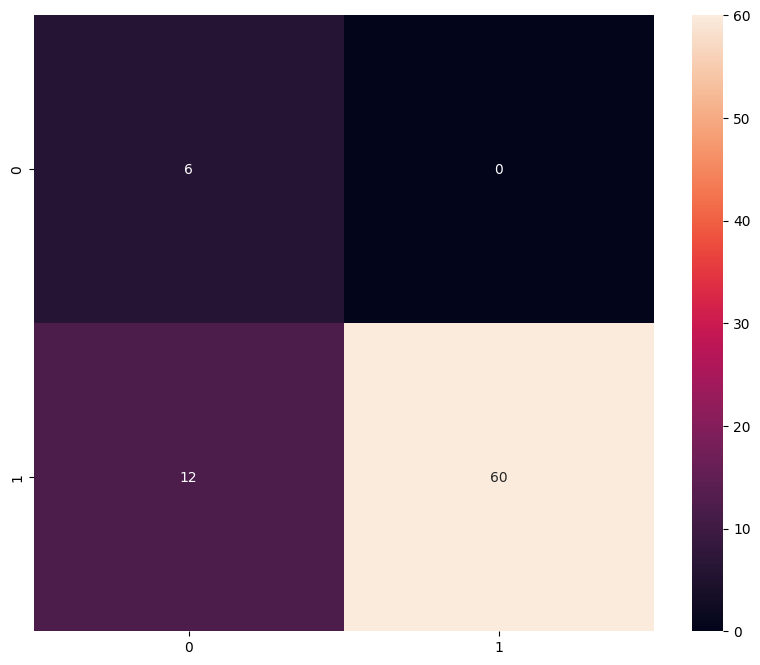

In [19]:
pred = svm_clf.predict(X_test)

print(confusion_matrix(pred,y_test))

plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(pred,y_test), annot=True);

In [20]:
# Evaluating a score by cross-validation
# cv determines the cross-validation splitting strategy
scores = cross_val_score(svm_clf, X_train, y_train,cv=5)

# average score
print("Accuracy: ", scores.mean(), scores.std() * 2)

Accuracy:  0.8483870967741935 0.048279450151921775


In [21]:
rfc = RandomForestClassifier(n_estimators=100)

k= rfc.fit(X_train, y_train)

print(rfc.score(X_test, y_test))

0.8589743589743589


[[ 9  2]
 [ 9 58]]


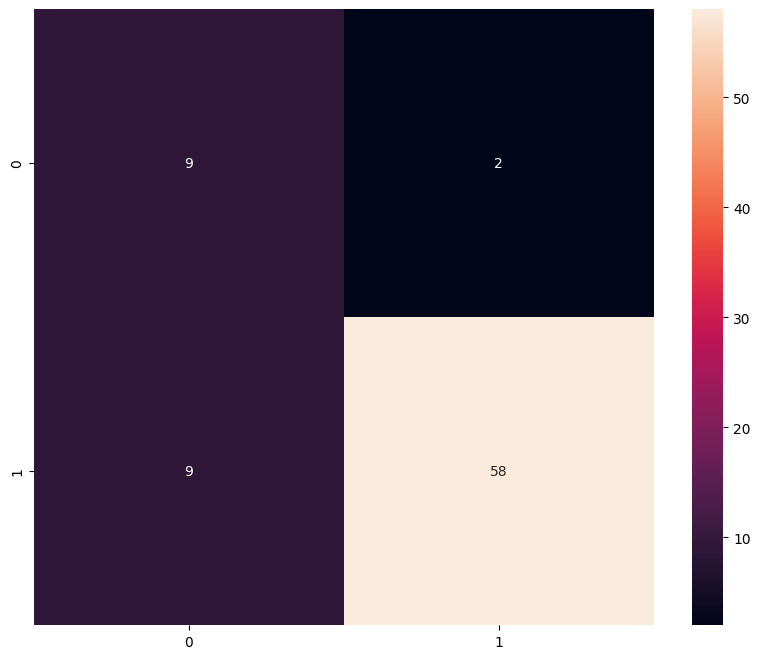

In [22]:
pred = rfc.predict(X_test)

print(confusion_matrix(pred,y_test))

plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(pred,y_test), annot=True);

In [23]:
# Evaluating a score by cross-validation
# cv determines the cross-validation splitting strategy
scores = cross_val_score(rfc, X_train, y_train,cv=5)

# average score
print("Accuracy: ", scores.mean(), scores.std() * 2)

Accuracy:  0.867741935483871 0.042795158585230926


In [24]:
r = random.randint(0,len(data))
print(r)
r=109
new_customer = data.drop('Output', axis=1).iloc[r]
new_customer

267


Age                               18.0000
Gender                             1.0000
Marital Status                     2.0000
Occupation                         3.0000
Monthly Income                     4.0000
Educational Qualifications         0.0000
Family size                        5.0000
latitude                          12.9635
longitude                         77.5821
Pin code                      560002.0000
Name: 109, dtype: float64

In [25]:
data.iloc[r]['Output']

1.0

In [26]:
rfc.predict(new_customer.values.reshape(1,10)) # predicted output

array([1])

In [27]:
svm_clf.predict(new_customer.values.reshape(1,10)) # predicted output

array([1])

[0.16141483 0.04004602 0.04729014 0.05578671 0.06978637 0.04879579
 0.09964339 0.17500611 0.16549677 0.13673386]


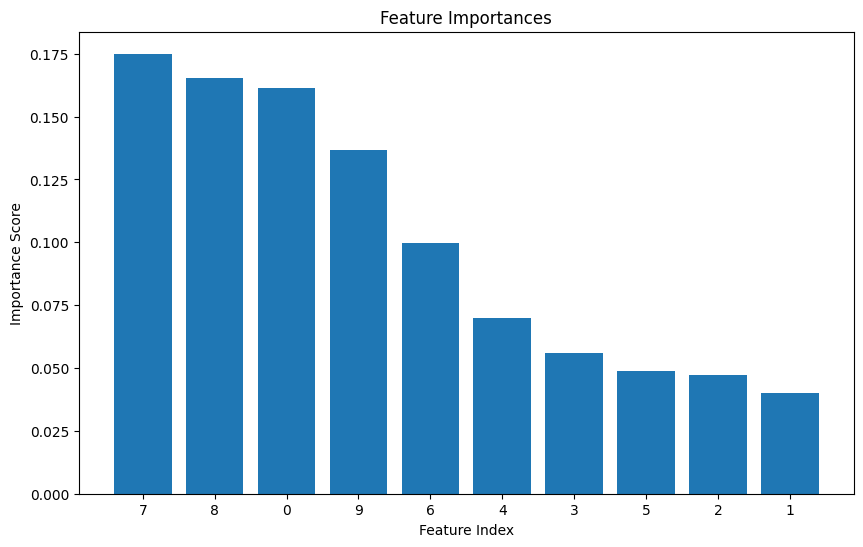

In [28]:
# Get feature importances
importances = rfc.feature_importances_

print(importances)

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlabel("Feature Index")
plt.ylabel("Importance Score")
plt.show()

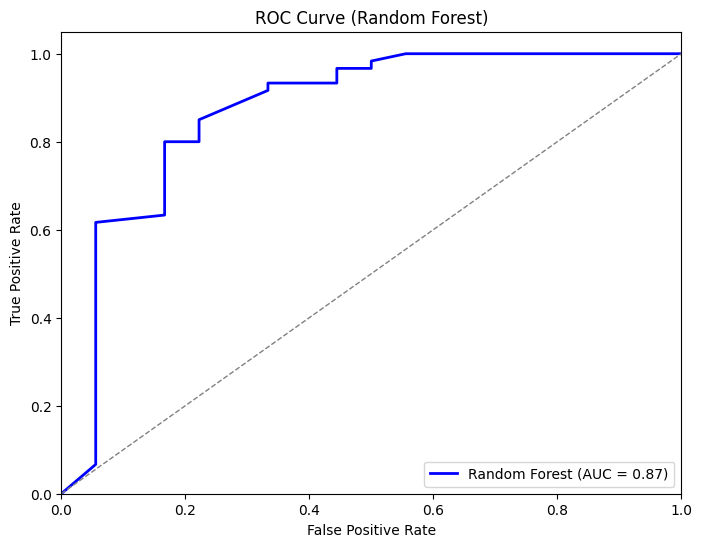

In [29]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for Random Forest
rf_probs = rfc.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_roc_auc = auc(rf_fpr, rf_tpr)

# Plot ROC curve for Random Forest
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, color='blue', lw=2, label='Random Forest (AUC = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Random Forest)')
plt.legend(loc='lower right')
plt.show()

In [30]:
from sklearn.metrics import classification_report
# Predictions for Random Forest and SVM
rf_preds = rfc.predict(X_test)
svm_preds = svm_clf.predict(X_test)

# Classification report for Random Forest
print("Random Forest:")
print(classification_report(y_test, rf_preds))

# Classification report for SVM
print("SVM:")
print(classification_report(y_test, svm_preds))

Random Forest:
              precision    recall  f1-score   support

           0       0.82      0.50      0.62        18
           1       0.87      0.97      0.91        60

    accuracy                           0.86        78
   macro avg       0.84      0.73      0.77        78
weighted avg       0.85      0.86      0.85        78

SVM:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50        18
           1       0.83      1.00      0.91        60

    accuracy                           0.85        78
   macro avg       0.92      0.67      0.70        78
weighted avg       0.87      0.85      0.81        78



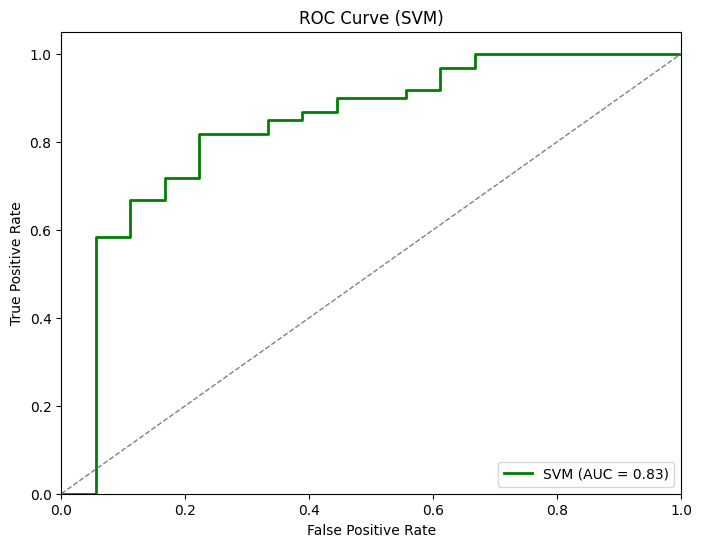

In [31]:
# Predict probabilities for SVM
svm_probs = svm_clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for SVM
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
svm_roc_auc = auc(svm_fpr, svm_tpr)

# Plot ROC curve for SVM
plt.figure(figsize=(8, 6))
plt.plot(svm_fpr, svm_tpr, color='green', lw=2, label='SVM (AUC = %0.2f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (SVM)')
plt.legend(loc='lower right')
plt.show()

In [32]:
# Number of Estimators
num_estimators = rfc.n_estimators

# Maximum Depth
max_depth = rfc.max_depth

# Minimum Samples Split
min_samples_split = rfc.min_samples_split

# Minimum Samples Leaf
min_samples_leaf = rfc.min_samples_leaf

# Maximum Features
max_features = rfc.max_features

print("Number of Estimators:", num_estimators)
print("Maximum Depth:", max_depth)
print("Minimum Samples Split:", min_samples_split)
print("Minimum Samples Leaf:", min_samples_leaf)
print("Maximum Features:", max_features)

Number of Estimators: 100
Maximum Depth: None
Minimum Samples Split: 2
Minimum Samples Leaf: 1
Maximum Features: sqrt


In [33]:
# Kernel Type
kernel_type = svm_clf.kernel

# Regularization Parameter (C)
C_value = svm_clf.C

# Kernel Coefficient (Gamma)
gamma_value = svm_clf.gamma

print("Kernel: ", kernel_type)
print("C: ", C_value)
print("Gamma: ", gamma_value)

Kernel:  rbf
C:  1.0
Gamma:  auto


In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train accuracy
    train_preds = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_preds)

    # Test accuracy
    test_preds = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_preds)

    # Precision
    precision = precision_score(y_test, test_preds)

    # Recall
    recall = recall_score(y_test, test_preds)

    # ROC AUC
    if hasattr(model, "predict_proba"):
        prob_pos = model.predict_proba(X_test)[:, 1]
    else:  # use decision function
        prob_pos = model.decision_function(X_test)
    roc_auc = roc_auc_score(y_test, prob_pos)

    return train_accuracy, test_accuracy, precision, recall, roc_auc

# Evaluate SVM model
svm_train_accuracy, svm_test_accuracy, svm_precision, svm_recall, svm_roc_auc = evaluate_model(svm_clf, X_train, y_train, X_test, y_test)

# Evaluate Random Forest model
rf_train_accuracy, rf_test_accuracy, rf_precision, rf_recall, rf_roc_auc = evaluate_model(rfc, X_train, y_train, X_test, y_test)

# Print results
print("SVM Model:")
print("Train Accuracy:", svm_train_accuracy)
print("Test Accuracy:", svm_test_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("ROC AUC:", svm_roc_auc)

print("\nRandom Forest Model:")
print("Train Accuracy:", rf_train_accuracy)
print("Test Accuracy:", rf_test_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("ROC AUC:", rf_roc_auc)

SVM Model:
Train Accuracy: 0.9612903225806452
Test Accuracy: 0.8461538461538461
Precision: 0.8333333333333334
Recall: 1.0
ROC AUC: 0.8333333333333334

Random Forest Model:
Train Accuracy: 1.0
Test Accuracy: 0.8589743589743589
Precision: 0.8656716417910447
Recall: 0.9666666666666667
ROC AUC: 0.8708333333333333


In [35]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100,150, 200]  # Adjust the values as needed
}

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameter values
best_n_estimators = grid_search.best_params_['n_estimators']

print("Best Number of Estimators:", best_n_estimators)

Best Number of Estimators: 200


In [36]:

records_for_age = data[data['Age'] == 18]

# Display the records
print(records_for_age)

     Age  Gender  Marital Status  Occupation  Monthly Income  \
109   18       1               2           3               4   

     Educational Qualifications  Family size  latitude  longitude  Pin code  \
109                           0            5   12.9635    77.5821    560002   

     Output  
109       1  


In [37]:
df_sorted = data.sort_values(by='Age', ascending=True)

In [38]:
df_sorted.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output
109,18,1,2,3,4,0,5,12.9635,77.5821,560002,1
133,19,1,2,3,4,0,2,13.0019,77.5713,560003,0
280,19,1,2,3,4,0,6,12.9048,77.6821,560036,1
134,19,0,2,3,4,0,4,12.9537,77.6176,560047,1
196,19,1,2,3,4,0,6,12.9442,77.6076,560030,1


In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_classifier = KNeighborsClassifier(n_neighbors=100)
# Train the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7692307692307693


In [40]:
# Evaluating a score by cross-validation
# cv determines the cross-validation splitting strategy
knn_scores = cross_val_score(knn_classifier, X_train, y_train,cv=5)

# average score
print("Accuracy: ", knn_scores.mean(), knn_scores.std() * 2)

Accuracy:  0.7774193548387098 0.0129032258064516


In [41]:
print(confusion_matrix(y_pred,y_test))

[[ 0  0]
 [18 60]]
